# Zadanie 1b  
Celem ćwiczeń jest implementacja metody gradientu prostego.

Należy zaimplementować metodę gradientu prostego, służącą do znajdywania minimum lokalnego zadanej funkcji celu:

$$\theta_{t+1}=\theta_{t} - \eta\nabla f(\theta_{t})$$
gdzie:
- $f(\theta_{t})$ to funkcja celu dla której szukamy minimum,
- $\theta_{t}$ to parametry funkcji celu w kroku $t$,
- $\eta$ to współczynnik uczenia definiujący tempo zmiany parametrów (ang. learning rate), który powinien być skalarem o niskiej wartości.

W ćwiczeniu należy zaimplementować tę metodę do znalezienia minimów lokalnych dwóch funkcji (podanych poniżej). Dodatkowo należy przebadać wpływ współczynnika uczenia $\eta$  oraz różnych parametrów początkowych $\theta_{t=0}$ na jakość rozwiązania. Należy zwizualizować proces minimalizacji, czyli pośrednie parametry $\theta_{t}$ na wykresie 2D.

W poniższej implementacji należy uzpełnić metody klasy `SimpleGradientDescent` i użyć ich do realizacji zadania.    
  
## Punktacja:    
 - Implementacja kroku gradientu prostego. **1 pkt**  
 - Przeprowadzenie przeszukiwania minimum na obu funkcjach - poprawny wynik. **1 pkt**  
 - Wizualizacja przeszukiwania z wielu miejsc początkowych i dla różnych wartości $\eta$. **2 pkt**


In [88]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

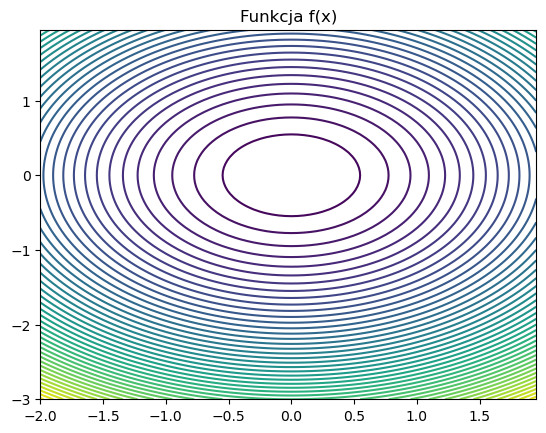

In [89]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.title("Funkcja f(x)")
plt.contour(X, Y, Z, 50)

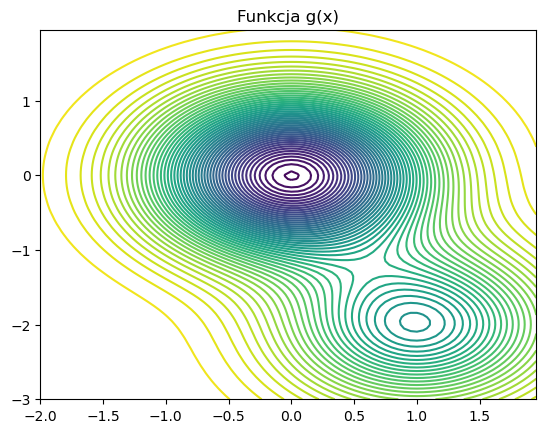

In [90]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.title("Funkcja g(x)")
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [91]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha: float = 0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace) > 0:
            plt.scatter(self.trace[:, 0], self.trace[:, 1], s=10, color="red")

    def calculate_func_value(self, x1: float, x2: float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1: float, x2: float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1: float, x2: float) -> Tuple[float, float]:
        dx1, dx2 = self.calculate_func_grad(x1, x2)
        return x1 - self.alpha * dx1, x2 - self.alpha * dx2

    def minimize(self,
                 x1_init: float,
                 x2_init: float,
                 steps: int = 100,
                 verbose: bool = False,
                 plot: bool = False) -> tuple[tuple[float, float], float]:
        start_time = time.process_time()
        
        x1, x2 = x1_init, x2_init
        self.trace = np.zeros((steps + 1, 2))
        self.trace[0] = x1, x2
        
        for i in range(steps):
            x1, x2 = self.gradient_descent_step(x1, x2)
            self.trace[i + 1] = [x1, x2]
            
            if verbose:
                print(f"Step: {i + 1}; \tx1 = {x1}; \tx2 = {x2}; \tf(x) = {self.calculate_func_value(x1, x2)}")
        
        if verbose:
            print(f"Time: {time.process_time() - start_time}")
        
        if plot:
            self.plot_func()
        
        return (x1, x2), self.calculate_func_value(x1, x2)
        

# Rozwiązanie

## Funkcja 1

Definicja pierwszej funkcji do przeszukania oraz funkcji jej gradientu:

In [92]:
def f(x1, x2) -> float:
    return x1**2 + x2**2


def grad_f(x1, x2) -> Tuple[float, float]:
    return 2 * x1, 2 * x2

Wykonanie programu do znajdowania minimum funkcji:


Step: 1; 	x1 = -1.6; 	x2 = -1.6; 	f(x) = 5.120000000000001
Step: 2; 	x1 = -1.28; 	x2 = -1.28; 	f(x) = 3.2768
Step: 3; 	x1 = -1.024; 	x2 = -1.024; 	f(x) = 2.097152
Step: 4; 	x1 = -0.8192; 	x2 = -0.8192; 	f(x) = 1.34217728
Step: 5; 	x1 = -0.65536; 	x2 = -0.65536; 	f(x) = 0.8589934592000001
Step: 6; 	x1 = -0.5242880000000001; 	x2 = -0.5242880000000001; 	f(x) = 0.5497558138880002
Step: 7; 	x1 = -0.4194304000000001; 	x2 = -0.4194304000000001; 	f(x) = 0.35184372088832017
Step: 8; 	x1 = -0.33554432000000006; 	x2 = -0.33554432000000006; 	f(x) = 0.22517998136852488
Step: 9; 	x1 = -0.26843545600000007; 	x2 = -0.26843545600000007; 	f(x) = 0.14411518807585594
Step: 10; 	x1 = -0.21474836480000006; 	x2 = -0.21474836480000006; 	f(x) = 0.09223372036854781
Step: 11; 	x1 = -0.17179869184000005; 	x2 = -0.17179869184000005; 	f(x) = 0.059029581035870596
Step: 12; 	x1 = -0.13743895347200002; 	x2 = -0.13743895347200002; 	f(x) = 0.03777893186295717
Step: 13; 	x1 = -0.10995116277760002; 	x2 = -0.10995116277760

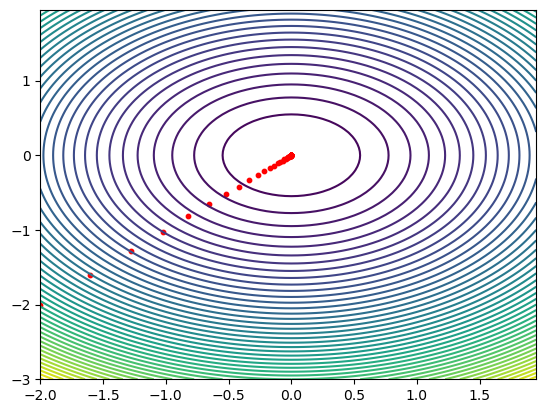

In [93]:
simple_gradient_descent_f = SimpleGradientDescent(f, grad_f, 0.1)
f_minimum, f_minimum_value = simple_gradient_descent_f.minimize(-2.0, -2.0, 100, verbose=True, plot=True)

In [94]:
print(f"Real minimum at: (0, 0); \tf(0, 0) = {f(0.0, 0.0)}; \tFound minimum: {f_minimum}; \tValue at found minimum: f(x1, x2) = {f_minimum_value}; \tError: {abs(f_minimum_value - f(0.0, 0.0))}")

Real minimum at: (0, 0); 	f(0, 0) = 0.0; 	Found minimum: (-4.0740719526689754e-10, -4.0740719526689754e-10); 	Value at found minimum: f(x1, x2) = 3.3196124551047996e-19; 	Error: 3.3196124551047996e-19


## Funkcja 2

In [95]:
def g(x1, x2) -> float:
    return 1.5 - np.exp(-x1**(2) - x2**(2)) - 0.5 * np.exp(-(x1 - 1)**(2) - (x2 + 2)**(2))


def grad_g(x1, x2) -> Tuple[float, float]:
    return (2 * x1 * np.exp(-x1**2 - x2**2) + (x1 - 1) * np.exp(-(x1 - 1)**2 - (x2 + 2)**2),
            2 * x2 * np.exp(-x1**2 - x2**2) + (x2 + 2) * np.exp(-(x1 - 1)**2 - (x2 + 2)**2))

Step: 1; 	x1 = 1.0894005922229602; 	x2 = -2.0886756640011668; 	f(x) = 1.0039754513471701
Step: 2; 	x1 = 1.0797536250899662; 	x2 = -2.078322623855321; 	f(x) = 1.0020613469192465
Step: 3; 	x1 = 1.0709816784620003; 	x2 = -2.0688637232959777; 	f(x) = 1.0004710775470342
Step: 4; 	x1 = 1.0630111200559365; 	x2 = -2.060225682727433; 	f(x) = 0.9991512423991591
Step: 5; 	x1 = 1.0557726857166312; 	x2 = -2.0523396388529043; 	f(x) = 0.9980566564600921
Step: 6; 	x1 = 1.0492017761233936; 	x2 = -2.045141404340052; 	f(x) = 0.9971493130723192
Step: 7; 	x1 = 1.0432385457004139; 	x2 = -2.038571525026522; 	f(x) = 0.9963973904915029
Step: 8; 	x1 = 1.0378278444263034; 	x2 = -2.0325751961255176; 	f(x) = 0.9957743395610372
Step: 9; 	x1 = 1.0329190597167295; 	x2 = -2.0271020846858403; 	f(x) = 0.9952580695411131
Step: 10; 	x1 = 1.0284658941163503; 	x2 = -2.0221060936764492; 	f(x) = 0.9948302362467364
Step: 11; 	x1 = 1.0244261052457715; 	x2 = -2.0175450935135966; 	f(x) = 0.9944756289087275
Step: 12; 	x1 = 1.02076

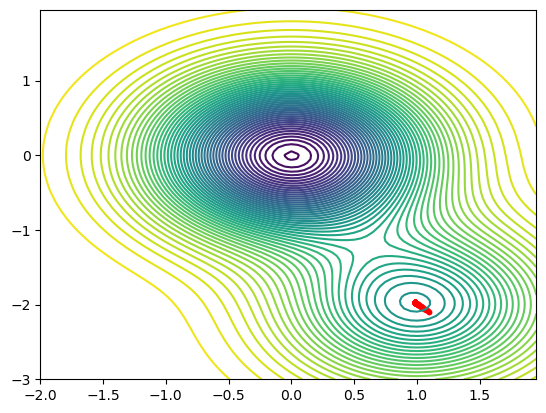

In [98]:
simple_gradient_descent_g = SimpleGradientDescent(g, grad_g, 0.1)
g_minimum, g_minimum_value = simple_gradient_descent_g.minimize(1.1, -2.1, 100, verbose=True, plot=True)

In [97]:
print(f"Real minimum at: (0, 0); \tg(0, 0) = {g(0.0, 0.0)}; \tFound minimum: {g_minimum}; \tValue at found minimum: g(x1, x2) = {g_minimum_value}; \tError: {abs(g_minimum_value - g(0.0, 0.0))}")

Real minimum at: (0, 0); 	g(0, 0) = 0.49663102650045726; 	Found minimum: (0.003476019229489994, -0.006952039206688455); 	Value at found minimum: g(x1, x2) = 0.4965724836763417; 	Error: 5.854282411554834e-05
